In [1]:
import pandas as pd
import altair as alt



url = "https://raw.githubusercontent.com/MarkHershey/CompleteTrumpTweetsArchive/refs/heads/master/data/realDonaldTrump_in_office.csv"

tweets = pd.read_csv(
    url,
    encoding="utf-8-sig",                       # removes a BOM "Byte Order Mark" at the beginning of the file (ChatGPT assist) 
    on_bad_lines="skip"                                 # skip the lines ending in weird characters and tripping up pandas
)
tweets.columns = tweets.columns.str.strip()                         # strip white-space from before column names 
#print(tweets.columns)
tweets["Date & Time"] = pd.to_datetime(tweets["Time"], errors="coerce")     # set Time column to index and rename
tweets = tweets.drop(columns=["ID", "Tweet URL", "Time"])
tweets = tweets.set_index("Date & Time")
tweets.head(10)

,Tweet Text
Date & Time,
2017-01-20 06:31:00,"""It all begins today! I will see you at 11:00..."
2017-01-20 11:54:00,"""We will bring back our jobs. We will bring b..."
2017-01-20 11:55:00,"""We will follow two simple rules: BUY AMERICA..."
2017-01-20 11:58:00,"""It is time to remember that...https://www.fa..."
2017-01-20 12:13:00,"""TO ALL AMERICANS https://www.facebook.com/Do..."
2017-01-21 05:53:00,"""A fantastic day and evening in Washington D...."
2017-01-22 06:47:00,"""Watched protests yesterday but was under the..."
2017-01-23 05:38:00,"""Busy week planned with a heavy focus on jobs..."
2017-01-24 05:11:00,"""Will be meeting at 9:00 with top automobile ..."


In [2]:
daytime = tweets.between_time("08:01", "16:00")      # 8:01 am - 4:00 pm
evening = tweets.between_time("16:01", "00:00")        # 4:01 pm - 12:00 am
overnight = tweets.between_time("00:01", "08:00")        # 12:01 am - 8:00 am

print(f"The number of tweets in the 'Daytime' category is: {len(daytime)}")
print(f"The number of tweets in the 'Evening' category is: {len(evening)}")
print(f"The number of tweets in the 'Overnight' category is: {len(overnight)}")

print("Just by the distribution of tweets it is surprisingly evenly spread; with the most tweets happening overnight.")

The number of tweets in the 'Daytime' category is: 3325
The number of tweets in the 'Evening' category is: 3653
The number of tweets in the 'Overnight' category is: 3706
Just by the distribution of tweets it is surprisingly evenly spread; with the most tweets happening overnight.


In [3]:
tw = pd.Series(tweets.index.strftime('%m-%d'), index=tweets.index)     # ChatGPT assistance to troubleshoot filtering datetimes in index

spring = tweets.loc[tw.between('04-01', '06-30')]                    # April 1st - June 30th
summer = tweets.loc[tw.between('07-01', '09-30')]                   # July 1st - September 30th
autumn = tweets.loc[tw.between('10-01', '12-31')]                  # October 1st - December 31st
winter = tweets.loc[tw.between('01-01', '03-31')]                 # January 1st - March 31st 

print(f"The number of tweets in the 'Spring' category is: {len(spring)}")
print(f"The number of tweets in the 'Summer' category is: {len(summer)}")
print(f"The number of tweets in the 'Autumn' category is: {len(autumn)}")
print(f"The number of tweets in the 'Winter' category is: {len(winter)}")
print("")
print("Judging by the distribution of tweets throughout the seasons, the frequency decays in the winter and spring and peaks in the summer")



The number of tweets in the 'Spring' category is: 2520
The number of tweets in the 'Summer' category is: 3148
The number of tweets in the 'Autumn' category is: 3067
The number of tweets in the 'Winter' category is: 1949

Judging by the distribution of tweets throughout the seasons, the frequency decays in the winter and spring and peaks in the summer


In [4]:
tweet_time = pd.DataFrame({
    "Time": ["daytime", "evening", "overnight"],
    "Count": [len(daytime), len(evening), len(overnight)]
})

tweet_time

,Time,Count
0,daytime,3325
1,evening,3653
2,overnight,3706


In [5]:
tweet_season = pd.DataFrame({
    "Season": ["Spring", "Summer", "Autumn", "Winter"],
    "Count": [len(spring), len(summer), len(autumn), len(winter)]
})

tweet_season

,Season,Count
0,Spring,2520
1,Summer,3148
2,Autumn,3067
3,Winter,1949


In [6]:
time_bars = alt.Chart(tweet_time).mark_bar(color="#f00808").encode(
    y = "Time:N", 
    x = "Count:Q",
    ).properties(
    title="Trump's Tweet Frequency by Time of Day",
    width=500,
    height=350)

time_bars

alt.Chart(...)

In [7]:
label_df = pd.DataFrame({
    "Time": ["daytime", "evening", "overnight"],
    "range": ["8:01am–4:00pm", "4:01pm–12:00am", "12:01am–8:00am"],
    "Count": tweet_time["Count"].values
})

In [8]:
range_text = (
    alt.Chart(label_df)
    .mark_text(
        align="center",
        baseline="middle",
        color="white",
        fontSize=16,
        dx=-80
    )
    .encode(
        y="Time:N",
        x="Count:Q",
        text="range:N"
    )
)

time_bars + range_text

alt.LayerChart(...)

In [9]:
count_text = alt.Chart(label_df).mark_text(
    align="left",
    baseline="middle",
    dx=5,
    color="black",
    fontSize=14
).encode(
    y="Time:N",
    x="Count:Q",      
    text="Count:Q"
)

tweet_times = time_bars + range_text + count_text
tweet_times

alt.LayerChart(...)

In [10]:
final_time_of_day_chart = (time_bars + range_text + count_text).properties(padding={"right": 50, "top":15, "bottom":15, "left":10})   # <= add some white-space to balance appearance

final_time_of_day_chart

alt.LayerChart(...)

In [11]:
season_bars = alt.Chart(tweet_season).mark_bar(color="#f00808").encode(
    x="Count:Q",
    y=alt.Y("Season:N",sort=["Spring", "Summer", "Autumn", "Winter"])
    ).properties(
    title="Trump's Tweet Frequency by Season",
    width=500,
    height=350)

season_bars

alt.Chart(...)

In [12]:
season_label_df = pd.DataFrame({
    "Season": ["Spring", "Summer", "Autumn", "Winter"],
    "range": ["April 1st - June 30th", "July 1st – Sept 30th", "Oct 1st – Dec 31st", "Jan 1st - March 31st"],
    "Count": tweet_season["Count"].values
})
season_label_df

,Season,range,Count
0,Spring,April 1st - June 30th,2520
1,Summer,July 1st – Sept 30th,3148
2,Autumn,Oct 1st – Dec 31st,3067
3,Winter,Jan 1st - March 31st,1949


In [13]:
season_range_text = alt.Chart(season_label_df).mark_text(
        align="center",
        baseline="middle",
        color="white",
        fontSize=16,
        dx=-90
    ).encode(
        y=alt.Y("Season:N",sort=["Spring", "Summer", "Autumn", "Winter"]),
        x="Count:Q",
        text="range:N"
    )

season_bars + season_range_text

alt.LayerChart(...)

In [14]:
season_count_text = alt.Chart(season_label_df).mark_text(
    align="left",
    baseline="middle",
    dx=5,
    color="black",
    fontSize=14
).encode(
    y=alt.Y("Season:N",sort=["Spring", "Summer", "Autumn", "Winter"]),
    x="Count:Q",      
    text="Count:Q"
)

tweet_seasons = season_bars + season_range_text + season_count_text
tweet_seasons

alt.LayerChart(...)

In [15]:
final_season_chart = (season_bars + season_range_text + season_count_text).properties(padding={"right": 50, "top":15, "bottom":15, "left":10})  # aesthetic padding 

final_season_chart

alt.LayerChart(...)

In [16]:
tweet_seasons | tweet_times

alt.HConcatChart(...)

In [17]:
tweet_charts = (tweet_seasons | tweet_times).properties(padding={"right": 50, "top":25, "bottom":25, "left":25}) 
tweet_charts

alt.HConcatChart(...)

Number of weak labeled tweets: 3527
weak_label
positive    2137
negative    1390
Name: count, dtype: int64
Validation accuracy (weak labels): 0.9985835694050992
Sentiment
positive    7817
negative    2867
Name: count, dtype: int64

Most frequent words in positive tweets:
          word  count
0        great   1216
1        thank    836
2    president    760
3        trump    547
4      america    392
5   whitehouse    371
6          big    325
7         news    309
8        today    297
9     american    264
10     country    234
11         new    227
12        maga    212
13          up    211
14        good    200
15        make    199
16         get    199
17       house    195
18     foxnews    180
19         day    179

Most frequent words in negative tweets:
           word  count
0     democrats    530
1         trump    468
2         biden    375
3     president    370
4            no    309
5           joe    228
6           out    203
7         media    201
8   impeachment   

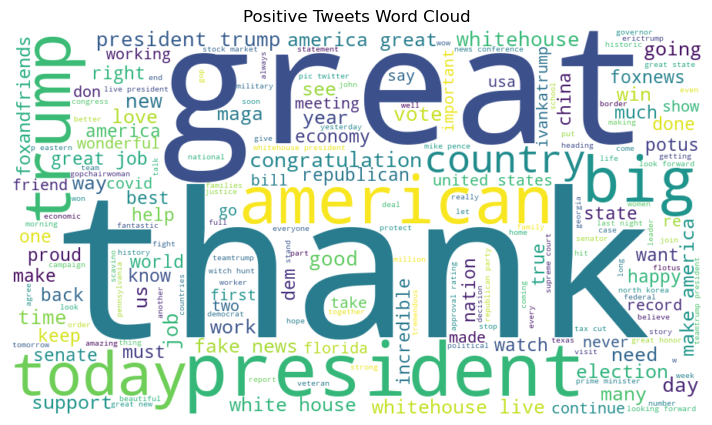

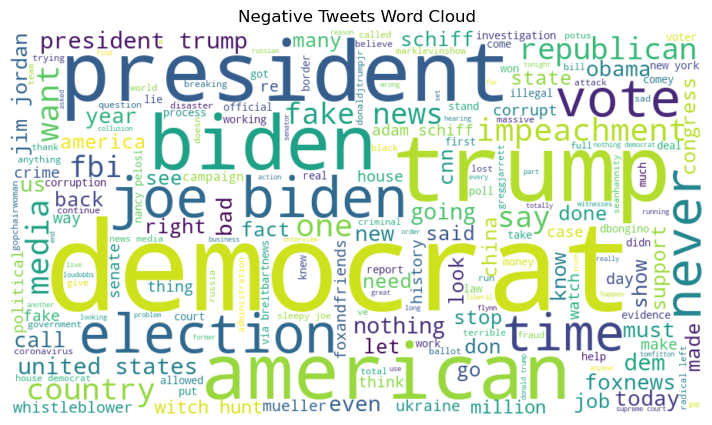

In [20]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

positive_words = set("""good great amazing fantastic tremendous strong win winning beautiful success successful
happy proud respect love best positive incredible honored grateful huge strong strongest great big""".split())

negative_words = set("""bad terrible horrible weak fail failure disaster sad angry corrupt
worst negative unfair hate disgrace stupid dishonest democrat biden obama democrats sleepy joe illegal""".split())  # democrat, biden, obama usually associated negatively when Trump speaks

stopwords = set("""the a an and of to in is it this that for on with be as by are was were will from at have has but not or if so
you your my our their they we i he she his her him them rt s all t just now amp more very about do what who people word should m realdonaldtrump u""".split())

# -------------------------------------------------------------------
# 1. Helper functions
# -------------------------------------------------------------------

def simple_tokenize(text: str):
    """Lowercase everything, remove URLs and non letters, then split."""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)          # remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)        # keep letters and spaces
    return text.split()

def weak_label(text: str):
    """Use positive and negative lexicons to create weak labels for training."""
    if not isinstance(text, str):
        return None
    tokens = simple_tokenize(text)
    pos_hits = sum(1 for w in tokens if w in positive_words)
    neg_hits = sum(1 for w in tokens if w in negative_words)
    if pos_hits > neg_hits:
        return "positive"
    elif neg_hits > pos_hits:
        return "negative"
    else:
        return None  # ambiguous, skip from training

# -------------------------------------------------------------------
# 2. Create weak labels for a subset of tweets
# -------------------------------------------------------------------

tweets["weak_label"] = tweets["Tweet Text"].apply(weak_label)
train_df = tweets.dropna(subset=["weak_label"]).copy()

print("Number of weak labeled tweets:", len(train_df))
print(train_df["weak_label"].value_counts())

# -------------------------------------------------------------------
# 3. Train a simple ML model using CountVectorizer
# -------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    train_df["Tweet Text"],
    train_df["weak_label"],
    test_size=0.2,
    random_state=42,
    stratify=train_df["weak_label"]
)

vectorizer = CountVectorizer(stop_words=list(stopwords), min_df=3)
X_train_vec = vectorizer.fit_transform(X_train.fillna(""))
X_test_vec = vectorizer.transform(X_test.fillna(""))

clf = LogisticRegression(max_iter=2000)
clf.fit(X_train_vec, y_train)

print("Validation accuracy (weak labels):", clf.score(X_test_vec, y_test))

# -------------------------------------------------------------------
# 4. Predict sentiment for all tweets (positive vs negative)
# -------------------------------------------------------------------

all_X = vectorizer.transform(tweets["Tweet Text"].fillna(""))
tweets["Sentiment"] = clf.predict(all_X)

print(tweets["Sentiment"].value_counts())

# -------------------------------------------------------------------
# 5. Answer the question "What are the most frequent words in the positive and negative tweets?"
# -------------------------------------------------------------------

pos_text = " ".join(tweets[tweets["Sentiment"] == "positive"]["Tweet Text"].dropna())
neg_text = " ".join(tweets[tweets["Sentiment"] == "negative"]["Tweet Text"].dropna())

pos_tokens = [w for w in simple_tokenize(pos_text) if w not in stopwords]
neg_tokens = [w for w in simple_tokenize(neg_text) if w not in stopwords]

top_pos = Counter(pos_tokens).most_common(20)
top_neg = Counter(neg_tokens).most_common(20)

top_pos_df = pd.DataFrame(top_pos, columns=["word", "count"])
top_neg_df = pd.DataFrame(top_neg, columns=["word", "count"])

print("\nMost frequent words in positive tweets:")
print(top_pos_df)

print("\nMost frequent words in negative tweets:")
print(top_neg_df)

# -------------------------------------------------------------------
# 6. Wordcloud
# -------------------------------------------------------------------
pos_wc = WordCloud(
    width=900,
    height=500,
    background_color="white"
).generate(" ".join(pos_tokens))

plt.figure(figsize=(10, 5))
plt.imshow(pos_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Tweets Word Cloud")
plt.show()

neg_wc = WordCloud(
    width=900,
    height=500,
    background_color="white"
).generate(" ".join(neg_tokens))

plt.figure(figsize=(10, 5))
plt.imshow(neg_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Tweets Word Cloud")
plt.show()